In [1]:
import torch, sys, os, random, json, scipy
import matplotlib.pyplot as plt
import numpy as np

from scipy.ndimage import zoom
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from neuralop.models import TFNO
from neuralop.utils import count_params
from scipy.io import savemat, loadmat
from tqdm import tqdm

%matplotlib widget

In [2]:
std = 10e-1
data_path = '/home/sci/hdai/Projects/Dataset/Ultrasound/GRF/mats'
water_tof = loadmat('/home/sci/hdai/Projects/Dataset/Ultrasound/GRF/water_tof.mat')

if not os.path.isdir(f'{data_path}/tof_noise{std}'):
    os.mkdir(f'{data_path}/tof_noise{std}')
    
for i in tqdm(range(1,200+1)):
    tof_array = np.zeros((128,128))
    for j in range(1,128+1):
        try:
            distribution_pair = loadmat(f'{data_path}/distribution_pair/grf{i}_pos{j}_distribution_pair.mat')
        except:
            print(f'{data_path}/distribution_pair/grf{i}_pos{j}_distribution_pair.mat')
            continue
        sensor_data = distribution_pair['simulation_data'][0][0]['sensor_data']
        length = sensor_data.shape[1]
        noise_j = np.random.normal(0,std,length)
        for k in range(128):
            noise_k = np.random.normal(0,std,length)
            corr_list = scipy.signal.correlate(sensor_data[j-1]+noise_j, sensor_data[k]+noise_k)
            tof_array[j-1,k] = (length-np.argmax(corr_list))*4e-8
    tof_dict = {}
    tof_dict['tof_array'] = tof_array - water_tof['tof_array']
    savemat(f'{data_path}/tof_noise{std}/grf{i}_tof.mat', tof_dict)

100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [19:53<00:00,  5.97s/it]


/tmp/ipykernel_27139/4044843990.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


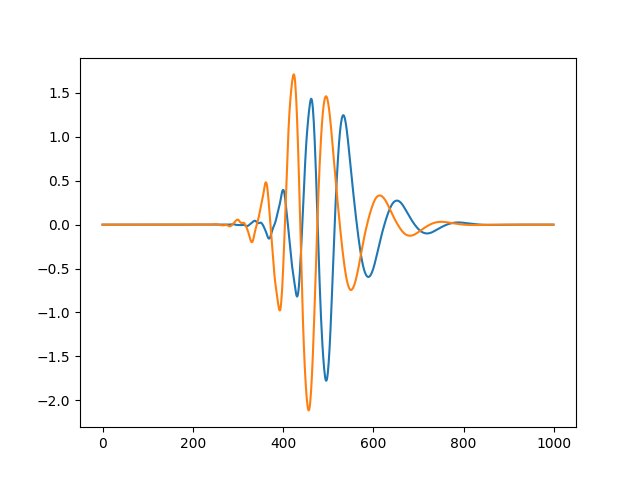

In [47]:
plt.figure()
plt.plot(sensor_data[31])
plt.plot(sensor_data[0])

In [57]:
corr_list = scipy.signal.correlate(sensor_data[31], sensor_data[0])
np.argmax(corr_list)

1038

In [ ]:
a = loadmat(f'{data_path}/tof_noise0.5/grf128_tof.mat')

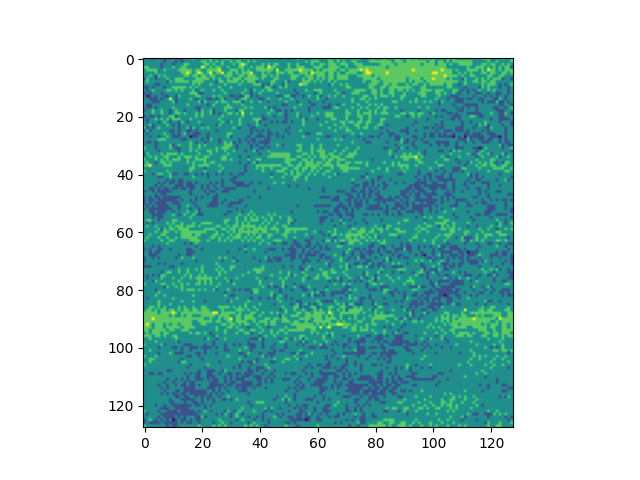

In [70]:
plt.figure()
plt.imshow(a['tof_array'])

In [22]:
a['tof_array']

array([[4.e-05, 4.e-05, 4.e-05, ..., 4.e-05, 4.e-05, 4.e-05],
       [4.e-05, 4.e-05, 4.e-05, ..., 4.e-05, 4.e-05, 4.e-05],
       [4.e-05, 4.e-05, 4.e-05, ..., 4.e-05, 4.e-05, 4.e-05],
       ...,
       [4.e-05, 4.e-05, 4.e-05, ..., 4.e-05, 4.e-05, 4.e-05],
       [4.e-05, 4.e-05, 4.e-05, ..., 4.e-05, 4.e-05, 4.e-05],
       [4.e-05, 4.e-05, 4.e-05, ..., 4.e-05, 4.e-05, 4.e-05]])